In [658]:
####################################################################################
#                                                                                  # 
# Trabalho Final das Disciplinas Estatística Aplicada e Programação com R e Python #
# Discentes: Isabella Calfa e Taian Feitosa                                        #
#                                                                                  #
####################################################################################

#Libs:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [630]:
#Exportações:
print(f'\n********* Inicio da Exportação de IMDB movies.csv *********')
df1 = pd.read_csv("IMDb movies.csv", low_memory=False)
print(f'*********** Fim da Exportação de IMDB movies.csv **********')
print(f'\n********* Inicio da Exportação de IMDB names.csv *********')
df2 = pd.read_csv("IMDb names.csv")
print(f'*********** Fim da Exportação de IMDB names.csv **********')
print(f'\n********* Inicio da Exportação de IMDB ratings.csv *********')
df3 = pd.read_csv("IMDb ratings.csv")
print(f'*********** Fim da Exportação de IMDB ratings.csv **********')
print(f'\n********* Inicio da Exportação de IMDB title_principals.csv *********')
df4 = pd.read_csv("IMDb title_principals.csv")
print(f'*********** Fim da Exportação de IMDB title_principals.csv **********')


********* Inicio da Exportação de IMDB movies.csv *********
*********** Fim da Exportação de IMDB movies.csv **********

********* Inicio da Exportação de IMDB names.csv *********
*********** Fim da Exportação de IMDB names.csv **********

********* Inicio da Exportação de IMDB ratings.csv *********
*********** Fim da Exportação de IMDB ratings.csv **********

********* Inicio da Exportação de IMDB title_principals.csv *********
*********** Fim da Exportação de IMDB title_principals.csv **********


In [ ]:
#Dados dos filmes - df1
df1.info()

In [ ]:
#Dados df1 (movies.csv)
df1.head()

In [631]:
#df1-Correção dos países:
#Total de linhas:
total_rows=df1["country"]
#Ajuste dos tipos de variáveis:
print(f'\n********* Correção por companhia *********')
df1["country"]=df1["country"].astype(str)
df1["production_company"]=df1["production_company"].astype(str)
#Filmes sem países:
no_country=df1[df1["country"]=="nan"].count()
print(f'Filmes sem países: {no_country["imdb_title_id"]}')
#Conversão pela moda:
dfx=df1[df1["country"]!="nan"] #Retirando países NaN pós conversão para string
dfx=df1.groupby(["production_company"])["country"].agg([pd.Series.min,pd.Series.mode])
dfx["mode_string"]=dfx["mode"].astype(str).str.startswith('[') 
df1=pd.merge(df1,dfx, how='left', on="production_company")
##Se houver mais de uma moda, considera pela primeira vez que a companhia apareceu
df1.loc[(df1["country"]=="nan") & (df1["mode_string"]==False),"country"]=df1["mode"]
df1.loc[(df1["country"]=="nan") & (df1["mode_string"]==True),"country"]=df1["min"]
#Títulos de teste:
df1[(df1["imdb_title_id"]=="tt3248148") | (df1["imdb_title_id"]=="tt0000009") | (df1["imdb_title_id"]=="tt10452854")]
#Validação pós correção:
no_country=df1[df1["country"]=="nan"].count()
print(f'Filmes sem países pós correção por companhia: {no_country["imdb_title_id"]}')
#Quantidade de países do filme:
df1["n_country"]=df1["country"].astype(str).str.count(',')+1
#Primeiro país do filme:
df1["first_country"]=df1["country"].astype(str).str.split(',').str[0]


********* Correção por companhia *********
Filmes sem países: 64
Filmes sem países pós correção por companhia: 26


In [632]:
#df1-Correção dos idiomas:
#Filmes sem idioma:
no_language=df1[df1["language"].isnull()].count()
print(f'Filmes sem idioma: {no_language["imdb_title_id"]}')
no_language_no_country=df1[(df1["country"]=="nan") & (df1["language"].isnull())].count()
print(f'Filmes sem países e sem idioma: {no_language_no_country["imdb_title_id"]}')
#Ajuste dos tipos de variáveis:
df1["language"]=df1["language"].astype(str)
#Moda do idioma por país do filme que produz: 
print(f'\n********* Correção por país *********')
modal_language_by_country=df1.groupby(["country"])["language"].agg(lambda x: pd.Series.mode(x).iat[0]).to_frame(name='new_language')
df1=pd.merge(df1,modal_language_by_country, how='left', on="country")
df1.loc[df1["language"]=="nan","language"]=df1.new_language
no_language=df1[df1["language"]=="nan"].count()
print(f'Filmes sem países pós correção por companhia: {no_language["imdb_title_id"]}')
#Quantidade de países do filme:
df1["n_language"]=df1["language"].astype(str).str.count(',')+1
#Primeiro país do filme:
df1["first_language"]=df1["language"].astype(str).str.split(',').str[0]

Filmes sem idioma: 833
Filmes sem países e sem idioma: 6

********* Correção por país *********
Filmes sem países pós correção por companhia: 19


In [ ]:
#df1-Correção das datas:
df1.loc[df1["imdb_title_id"]=="tt8206668","date_published"]=2019
df1.loc[df1["imdb_title_id"]=="tt8206668","year"]=2019
df1["date_published"]=pd.to_datetime(df1["date_published"],errors = "coerce")
df1[df1["date_published"].isnull()==True]

In [ ]:
#df1-Correção de anos:
df1["year"]=pd.to_numeric(df1["year"],errors = "coerce")
df1[df1["year"].isnull()==True]

In [ ]:
#Dados de pessoas - df2
df2.info()
#Sem necessidade de tratamento dos dados
#Se for utilizar dados de datas de nascimento e morte, precisa tratar.

In [ ]:
#Dados de notas - df3
df3.info()
#Sem necessidade de tratamento dos dados

In [ ]:
#Dados de atividades de pessoas - df4
df4.info()
#Sem necessidade de tratamento dos dados

In [ ]:
df4[df4["job"].notnull()]

<AxesSubplot:xlabel='decade', ylabel='avg_vote'>

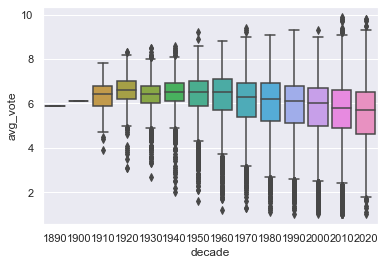

In [691]:
#Boxplot - Notas por Ano:
#df1.iloc[:,1:15]
sns.color_palette("husl", 2)
sns.boxplot(x="decade", y="avg_vote", data=df1)

